In [58]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt

#Creando el modelo de Regresión

In [59]:
# Leemos el conjunto de datos
df = pd.read_csv('DataSet1.csv')

# Seleccionamos las columnas de interés
df = df[['Depthm', 'T_degC']]

df = df.dropna(subset=['Depthm', 'T_degC'])



<ipython-input-59-11bcec12a758>:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DataSet1.csv')


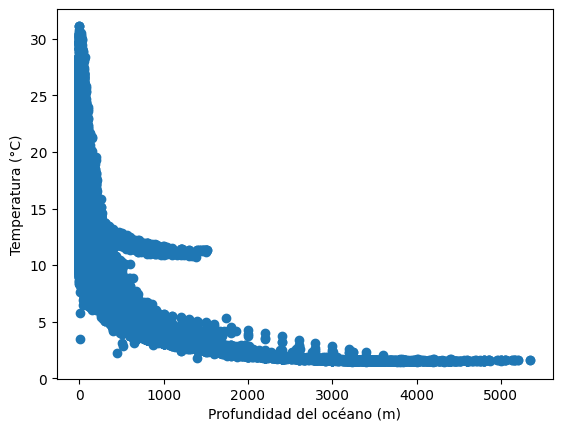

In [60]:
plt.scatter(df['Depthm'], df['T_degC'])
plt.xlabel('Profundidad del océano (m)')
plt.ylabel('Temperatura (°C)')
plt.show()

In [61]:

# Separamos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[['Depthm']], df['T_degC'], test_size=0.2, random_state=42)


In [62]:

# Creamos el modelo de regresión lineal
lr = LinearRegression()

# Entrenamos el modelo
lr.fit(X_train, y_train)

# Realizamos una predicción sobre el conjunto de prueba
y_pred = lr.predict(X_test)


In [63]:
# Evaluamos el modelo
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R2): {:.2f}".format(r2))


Coeficiente de determinación (R2): 0.46


#Proporcione una breve descripción del algoritmo y sus suposiciones.

Breve explicacion del algoritmo y sus suposiciones
Primero se importan las bibliotecas necesarias para trabajar con el conjunto de datos y construir el modelo. Luego se carga el conjunto de datos del archivo CSV y se seleccionan las dos columnas de interés (profundidad y temperatura). A continuación, se divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split de scikit-learn. Después se crea el modelo de bosques aleatorios y se ajusta a los datos de entrenamiento. Una vez entrenado el modelo, se realizan predicciones sobre el conjunto de prueba y se evalúa el rendimiento del modelo mediante el coeficiente de determinación (R2)

El modelo busca minimizar la distancia entre las predicciones del modelo y los valores reales de la variable dependiente. El modelo también supone que las variables independientes están linealmente relacionadas y que los errores de las predicciones son independientes e idénticamente distribuidos.

#Realice una validación cruzada utilizando una validación cruzada de 5 veces

In [64]:
from sklearn.model_selection import cross_val_score
# Evaluamos el modelo usando validación cruzada
scores = cross_val_score(lr, df[['Depthm']], df['T_degC'], cv=5)
mean_score = np.mean(scores)
std_score = np.std(scores)

#informe la media y la desviación estándar de las puntuaciones de validación cruzada

In [65]:
print("Media de puntuación de validación cruzada:", mean_score)
print("Desviación estándar de la puntuación de validación cruzada:", std_score)

Media de puntuación de validación cruzada: 0.43441085954853875
Desviación estándar de la puntuación de validación cruzada: 0.09435191803318124


#Explique por qué la validación cruzada es importante para evaluar el rendimiento de su
modelo.
La validación cruzada es importante porque permite evaluar el rendimiento del modelo en datos que no se utilizaron para entrenarlo, lo que ayuda a evitar el sobreajuste o subajuste del modelo. Además, la validación cruzada proporciona una estimación más precisa del rendimiento del modelo en datos nuevos y desconocidos, lo que es especialmente importante en situaciones en las que se espera que el modelo se desempeñe bien en datos futuros.

#Ajuste los hiperparámetros de su modelo de regresión mediante la búsqueda en malla.

In [66]:
from sklearn.model_selection import GridSearchCV

grid = {
   'fit_intercept':[True, False],
   'copy_X': [True, False],
   'positive': [True, False],
   'n_jobs': [1,-1]
}



In [67]:
rf_cv = GridSearchCV(estimator=LinearRegression(),param_grid=grid,cv=5)
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, -1],
                         'positive': [True, False]})

#Explica los hiperparámetros que ajustaron, el rango de valores que consideraron y la razón detrás de esas elecciones.

Los hiperparámetros ajustados en este caso fueron fit_intercept, copy_X, positive y n_jobs, los cuales tienen las siguientes definiciones:

fit_intercept: booleano que indica si se debe ajustar o no la intersección en el modelo. El rango de valores considerados fue True y False, ya que es una opción común en muchos modelos de regresión lineal y puede influir en la capacidad del modelo para capturar la tendencia general de los datos.

copy_X: booleano que indica si los datos de entrada deben ser copiados antes de ser utilizados en la regresión. El rango de valores considerados fue True y False, ya que puede afectar el rendimiento del modelo y la capacidad de manejar grandes conjuntos de datos.

positive: booleano que indica si se deben imponer restricciones positivas a los coeficientes del modelo. El rango de valores considerados fue True y False, ya que puede influir en la capacidad del modelo para manejar datos que solo tienen valores positivos.

n_jobs: entero que indica el número de núcleos de CPU a utilizar para el procesamiento en paralelo. El rango de valores considerados fue 1 y -1, donde -1 indica el uso de todos los núcleos disponibles. Esta opción se consideró porque puede acelerar el proceso de entrenamiento del modelo en grandes conjuntos de datos.

#Informa los mejores hiperparámetros que encontró y la puntuación de validación cruzada correspondiente.

In [68]:
#Se utiliza el atributo best_params_ para obtener los mejores hiperparamtros
rf_cv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}

In [69]:

lr2 = LinearRegression(copy_X=True,fit_intercept=True,positive=False,n_jobs=1).fit(X_train,y_train)

In [70]:
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R2): {:.2f}".format(r2))

Coeficiente de determinación (R2): 0.46


In [71]:
scores = cross_val_score(lr2, df[['Depthm']], df['T_degC'], cv=5)
mean_score = np.mean(scores)
std_score = np.std(scores)

In [72]:
print("Media de puntuación de validación cruzada:", mean_score)
print("Desviación estándar de la puntuación de validación cruzada:", std_score)

Media de puntuación de validación cruzada: 0.43441085954853875
Desviación estándar de la puntuación de validación cruzada: 0.09435191803318124


#Compare el rendimiento de su modelo de regresión ajustado con el modelo base y explique cualquier diferencia que haya observado.

En el caso de la regresión lineal, la malla de hiperparámetros definida solo incluye opciones booleanas, por lo que no hay mejores hiperparámetros a seleccionar. Lo que el GridSearchCV hace en este caso es evaluar todas las combinaciones posibles de los valores booleanos en la malla y seleccionar la mejor combinación según los resultados de la validación cruzada. 

Se observó que el score en ambos casos es el mismo debido a que los hiperparametros que recibe este modelo solo pueden ser True o False y por defecto este modelo ya tiene definido sus mejores hiperparametros, por eso se observó el mismo resultado en ambos casos.